# Fourier Work
The following are exercises from Mark Newman's Computational Physics book.

## 1) Basics of DFTs

In [1]:
#import numba
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

1.1 Write a function that performs a discrete Fourier Transform on a *real-valued* signal.

Bonus: utilize `numba.njit` to optimize the function.

In [2]:
# 1.1 SOLUTION takes in n samples, n = 0,1,2,3...N-1
def four(samples):
    lyst = []
    for k in range((len(samples)//2)+1):
        summ = 0
        for n in range(len(samples)):
            summ += samples[n] * np.exp(-1j*2*np.pi*(k/len(samples))*n)
        lyst.append(summ)
    return np.asarray(lyst)
        
print(four([6,4,3,10,50]))
print(np.fft.rfft([6,4,3,10,50]))

[ 73.00000000 +0.j          12.16969677+47.86309652j
 -33.66969677+20.38072599j]
[ 73.00000000 +0.j          12.16969677+47.86309652j
 -33.66969677+20.38072599j]


# Consider the sine-wave with period $T$ (and thus frequency $\frac{1}{T}$). Let's assume that $T$ has units of seconds.

\begin{equation}
f(t) = sin(\frac{2 \pi}{T}t)
\end{equation}

1.2 Using Euler's formula, write this sine wave in the form of a Fourier series.
> 1.2 Solution: $f(t) = \dots$


1.3 Take $N$ samples of this sine wave over several complete periods of oscillation (an integer multiple of $T$). That is, at $t = \frac{n}{N}L$; for $n = 0, 1, ... N-1$.

In [3]:
#(e^ix-e^-ix)/ 2i T=4*150, N = 100
T = 600
N = 100
lyst = np.linspace(0, 4*T-1, N)
lyst1 = np.sin(lyst*2*np.pi/T)  
    

1.4 Plot the sampled signal, $y_{n}$.

<IPython.core.display.Javascript object>


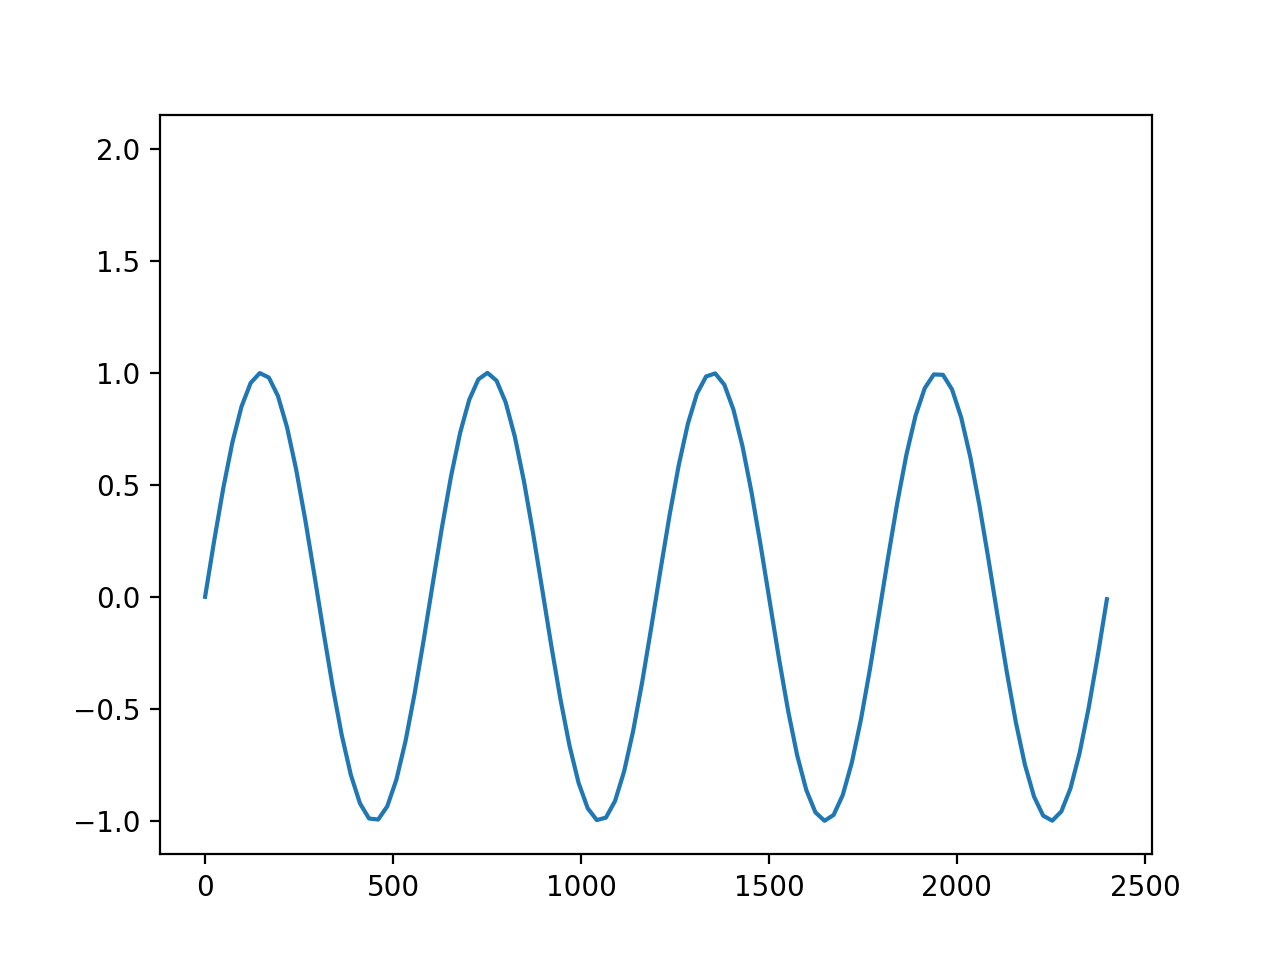

In [4]:
plt.plot(lyst,lyst1)

1.5 Perform a real-valued DFT of the sampled wave-form, obtaining $c_{k}$. How many Fourier-coefficients will be produced? Verify that numpy's FFT (for real-valued signals), `np.fft.rfft`, returns the same results. Use the function `numpy.allclose`.

In [5]:
# 1.5 Solution
print(np.allclose(four(lyst1), np.fft.rfft(lyst1)))

True


1.6 $k$ takes on integer values: $0, 1, ..., N//2 + 1$. Convert $k$ into frequency, $\nu$, with units of Hz ( 1 / seconds ).


In [43]:
# 1.6 SOLUTION
freqs = np.arange(N)
freqs = freqs[:(N//2) + 1]/T
freqs

array([ 0.        ,  0.00166667,  0.00333333,  0.005     ,  0.00666667,
        0.00833333,  0.01      ,  0.01166667,  0.01333333,  0.015     ,
        0.01666667,  0.01833333,  0.02      ,  0.02166667,  0.02333333,
        0.025     ,  0.02666667,  0.02833333,  0.03      ,  0.03166667,
        0.03333333,  0.035     ,  0.03666667,  0.03833333,  0.04      ,
        0.04166667,  0.04333333,  0.045     ,  0.04666667,  0.04833333,
        0.05      ,  0.05166667,  0.05333333,  0.055     ,  0.05666667,
        0.05833333,  0.06      ,  0.06166667,  0.06333333,  0.065     ,
        0.06666667,  0.06833333,  0.07      ,  0.07166667,  0.07333333,
        0.075     ,  0.07666667,  0.07833333,  0.08      ,  0.08166667,
        0.08333333])

1.7 What should the plot of $|c_{k}|$ vs $k$,  look like, given the data we took the DFT of?
> 1.7 Solution: Explain here
all of c(k) would be zero because since we are sampling a sine function, there will be exactly one function that matches that matches our original function. all other c'k are 0, the matching one has c'k of 1


1.8 Plot $|c_{\nu}|$ vs $\nu$ along with a vertical line, where you predict the peak to occur.

<IPython.core.display.Javascript object>


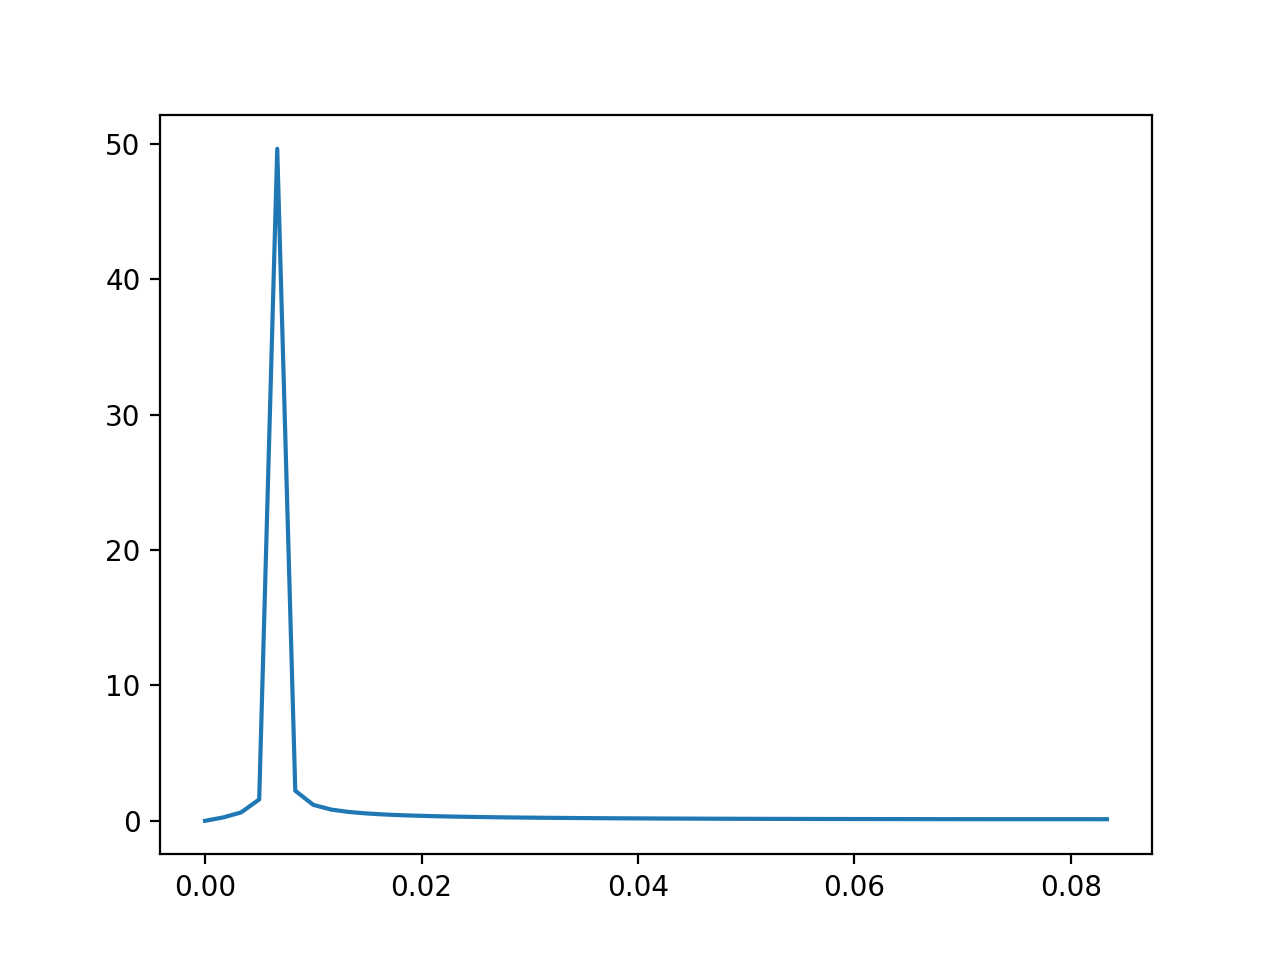

In [45]:
# 1.8 SOLUTION
plt.figure(2)
plt.plot(freqs, np.abs(four(lyst1)))

Assume that this peak-valued coefficient, $c_{p}$, is the only non-zero coefficient. In reality there are a few very small, but non-zero coefficients in its viscinity.

Given the Fourier series that you wrote above, and the equation for the DFT, see that the following relation must hold
\begin{equation}
\frac{1}{2i}e^{i\frac{2 \pi}{T}t} + \frac{-1}{2i}e^{i\frac{2 \pi (T - 1)}{T}t} \approx \frac{1}{N}(c_{p}e^{i\frac{2 \pi}{T}t} + c^{*}_{p}e^{-i\frac{2\pi}{T}t})
\end{equation}

1.8 Verify that $\frac{c_{p}}{N} \approx \frac{1}{2i}$

In [68]:
# 1.8 SOLUTION
print(np.amax(np.abs(four(lyst1)))/N)
print(np.abs(1/(2*1j)))


0.496339889942
0.5


Recall that the DFT expression on the right exactly reproduces the *sampled* data, and not the exact sine-wave. Furthermore, there are other small, but non-zero coefficients from our DFT that we are ignoring. This is why the equality is only approximate. Try increasing $N$, and see that this improves the precision of the equality.

1.9 Using the approximate expression on the right, write a function that performs an inverse DFT in order to recover the sampled data, $y_{n}$:

\begin{equation}
y(t_n) \approx \frac{1}{N}(c_{p}e^{i\frac{2 \pi}{T}t_n} + c^{*}_{p}e^{-i\frac{2\pi}{T}t_n})
\end{equation}



In [9]:
# 1.9 SOLUTION


1.10 Plot the recovered sampled data and the original data. Once again, note that we are making an approximation in this inverse DFT, since we are only using the peak-valued coefficient. If we utilized all of the coefficients, the resampled data will match **exactly** with the sampled data.

In [10]:
# 1.10 SOLUTION

1.11 Use `np.fft.irfft` to compute the *exact* inverse DFT and verify that it recovers the original sampled data. Use `np.allclose`.

In [70]:
# 1.11
np.allclose(np.fft.irfft(four(lyst1)), lyst1)

True

1.12 Given this result, what information is needed in addition to the Fourier coefficients to completely reproduce the original data and its domain?
> Explanation u need the x values that corresponds to the y values and the N value